# Cargado de los datos y de los paquetes


Cargamos todos los paquetes que vamos a utilizar, así como el *dataset* donde encontramos los datos. Lo hacemos en *Pandas*, uno de los paquetes, para tener una visualización más limpia y, si tenemos que tocarlo, un tratamiento más rápido. 

In [41]:
import numpy as np 
import pandas as pd 

from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import fcluster
import networkx as nx

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [42]:
df = pd.read_table('/content/drive/MyDrive/prueba_PLV.csv', sep=';', header=None) # Para csv, utilizamos como separación ',' o ';', dependiendo. Para tsv, utilizaríamos como separación
                                                                                  # '\t' (tabluación). Si no tenemos encabezado, como es en el caso de PLV, tenemos que decirlo (header=None).
                                                                                  # Si, por el contrario, si tenemos encabezado, tenemos que borrar esta opción o poner el número de la 
                                                                                  # fila que funciona como encabezado. Si marcamos header='infer', el algoritmo infiere cual de la filas 
                                                                                  # debe funcionar como encabezado, infiriendo el formato y agrupación. Importante leer la ruta de manera 
                                                                                  # adecuada. Recomiendo subirlo a Drive. 
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.464789,0.276462,0.330432,0.275477,0.267372,0.257465,0.341056,0.263644,0.281236,0.258150,...,0.311663,0.262217,0.293517,0.259800,0.282871,0.260990,0.279197,0.257626,0.266835,0.254340
1,0.276462,0.451503,0.271092,0.329094,0.260224,0.258107,0.265186,0.331792,0.263541,0.260394,...,0.267719,0.297435,0.274232,0.265320,0.256542,0.275344,0.270001,0.257627,0.260503,0.260167
2,0.330432,0.271092,0.421651,0.305779,0.394703,0.316455,0.396359,0.280967,0.400456,0.300297,...,0.270099,0.258818,0.289799,0.265144,0.262180,0.262334,0.281070,0.263784,0.257458,0.260655
3,0.275477,0.329094,0.305779,0.417079,0.320435,0.350991,0.292491,0.371279,0.294626,0.359608,...,0.260459,0.260317,0.269289,0.268508,0.259229,0.261409,0.268946,0.263500,0.261628,0.255957
4,0.267372,0.260224,0.394703,0.320435,0.703733,0.469550,0.324426,0.282776,0.647522,0.370573,...,0.280907,0.252787,0.388441,0.283462,0.264546,0.259080,0.368460,0.302769,0.265736,0.262862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.260990,0.275344,0.262334,0.261409,0.259080,0.271180,0.261411,0.262504,0.260006,0.264886,...,0.266253,0.410138,0.269844,0.351087,0.266294,0.448063,0.268392,0.336547,0.269244,0.406777
86,0.279197,0.270001,0.281070,0.268946,0.368460,0.297149,0.288692,0.260547,0.411025,0.268131,...,0.322116,0.275303,0.609874,0.301881,0.345367,0.268392,0.614728,0.325850,0.399419,0.272724
87,0.257626,0.257627,0.263784,0.263500,0.302769,0.375419,0.262191,0.274796,0.294755,0.356064,...,0.263559,0.343348,0.314259,0.572695,0.259826,0.336547,0.325850,0.594656,0.277093,0.376634
88,0.266835,0.260503,0.257458,0.261628,0.265736,0.261795,0.262063,0.258844,0.281311,0.261141,...,0.360722,0.277983,0.390403,0.275101,0.407474,0.269244,0.399419,0.277093,0.493715,0.274259


# Primeros pasos: optimización del número de grupos. 

En esta sección, vamos a comprobar cuál es el número óptimo de grupos en los que podemos divididr nuestro *dataset* mediante diferentes métricas.

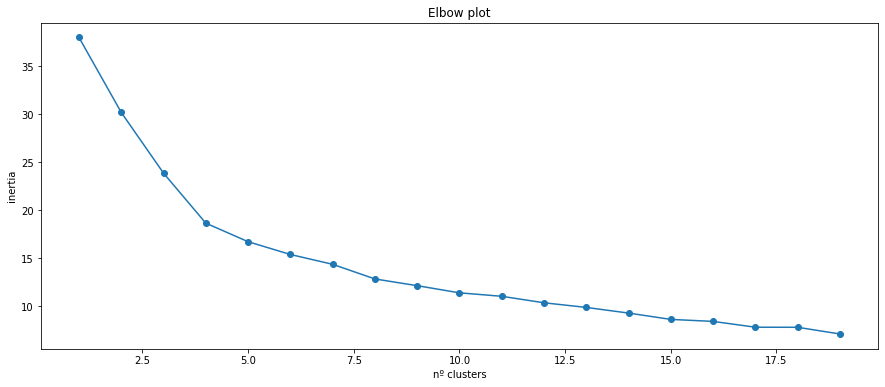

In [43]:
# Primero, vamos a evitar que nuestro dataframe tenga NaNs en el interior

from numpy import *
where_are_NaNs = isnan(df)
df[where_are_NaNs]=0

# Ahora, vamos a calcular la inercia del grupo, la coherencia y cohesión del grupo. De este modo, vamos a comprobar cuan coherente es dicho número de grupos, y, por lo tanto, cuál es el 
# número óptimo de grupos que podemos tener. 

inercia = []
for i in range(1,20): # Utilizamos un rango de 20 grupos para hacer un bucle de modelos y sacar, de ellos, la inercia, que llevamos a una lista vacía
  modelo = KMeans(n_clusters=i, init = 'k-means++', 
                  max_iter = 300, n_init = 10)
  modelo.fit(df)
  inercia.append(modelo.inertia_) # Añadimos la inercia a la lista, para después poder representarla

# Con la lista de inercias calculada, podemos representarla para ver como va disminuyendo la coherencia interna de los grupos. El codo de la representación será el punto que buscamos. 

plt.figure(figsize=[15,6])
plt.title('Elbow plot')
plt.xlabel('nº clusters')
plt.ylabel('inertia')
plt.plot(list(range(1,20)), inercia, marker='o')
plt.show()

In [44]:
# En este paso, comenzamos a calcular otra de las métricas que tenemos a nuestra disposición: el coeficiente de Silhouette. Esto nos permitirá conocer la cohesión y distancia entre grupos. 

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df) for k in range(1,10)] # Hacemos una iteración con un rango de 10 grupos para el modelo de KMeans
silhouette_scores = [silhouette_score(df, model.labels_) for model in kmeans_per_k[1:]] # Sacamos la puntación de Silhouette y la guardamos en una lista, como vemos abajo
silhouette_scores

[0.20432291970251076,
 0.24863155211518723,
 0.2839292525481983,
 0.2509320976414728,
 0.23607776369052175,
 0.21886774173257417,
 0.2075754737804288,
 0.22089047049212832]

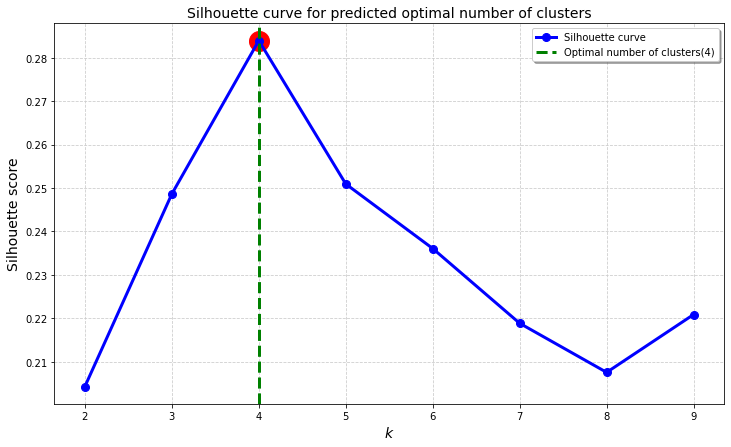

In [45]:
# Tras obtener una lista de coeficiente de Silhouette para diferentes números de grupos, lo representamos, indicando el valor máximo de Silhouette que encontramos.

plt.figure(figsize=(12,7))
plt.plot(range(2,10), silhouette_scores, 'bo-', color='blue', linewidth=3, markersize=8, label='Silhouette curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Silhouette score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Silhouette curve for predicted optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(silhouette_scores) + 2 # Para obtener los índices de mayor valor entre todos los ejes de puntuaciones de Silhouette de manera normalizada. 

plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, silhouette_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show() 

Haremos lo mismo que hemos hecho con *Silhouette*, pero con las otras dos métricas más utilizadas: *Calinski-Harabasz* y *Davies-Bouldin*.

In [46]:
CH_scores = [calinski_harabasz_score(df, model.labels_) for model in kmeans_per_k[1:]] # Sacamos la puntación de CH y la guardamos en una lista, como vemos abajo. No es necesario volver a 
                                                                                       # iterar el modelo como hicimos antes; podemos utilizar esa misma variable. 
CH_scores

[22.954000908981623,
 26.05092757545432,
 29.784771250157828,
 27.130074514971966,
 25.138441642904453,
 23.31100470902817,
 20.9878713839396,
 21.843315855897696]

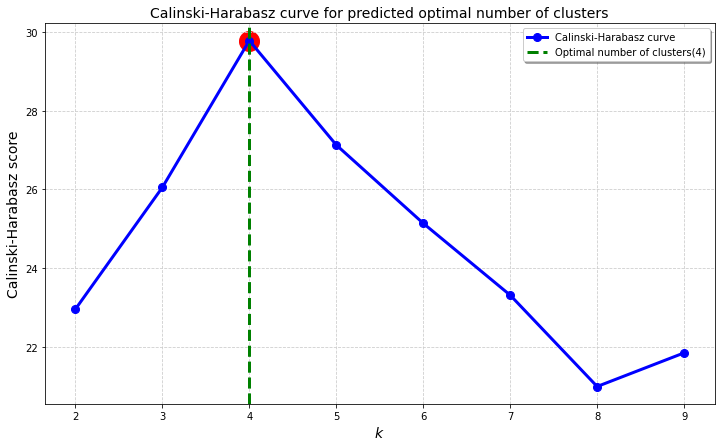

In [47]:
# Lo representamos como hicimos antes. 

plt.figure(figsize=(12,7))
plt.plot(range(2,10), CH_scores, 'bo-', color='blue', linewidth=3, markersize=8, label='Calinski-Harabasz curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Calinski-Harabasz score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Calinski-Harabasz curve for predicted optimal number of clusters', family='Arial', fontsize=14)

k = np.argmax(CH_scores) + 2 # Para obtener los índices de mayor valor entre todos los ejes de puntuaciones de CH de manera normalizada.

plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, CH_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show() 

In [48]:
DB_scores = [davies_bouldin_score(df, model.labels_) for model in kmeans_per_k[1:]] #Sacamos la puntación de DB y la guardamos en una lista, como vemos abajo
DB_scores

[1.925847920537309,
 1.4703616447246262,
 1.247381929410071,
 1.3926699259778563,
 1.3657867090074038,
 1.4128372360618944,
 1.4321811305809162,
 1.3699379400269054]

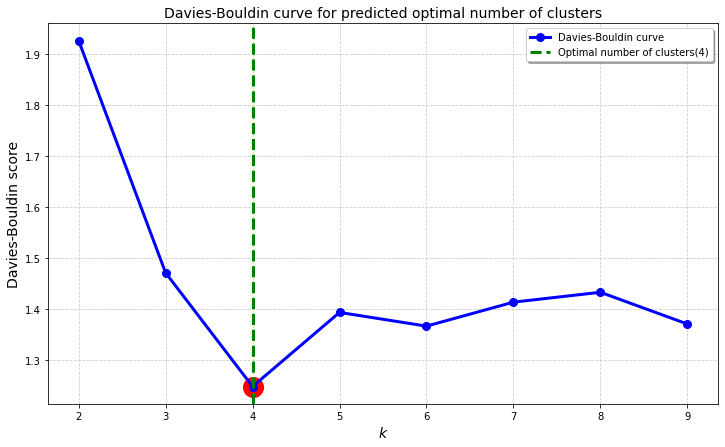

In [49]:
# Lo representamos. Como podemos ver, en este caso no estamos considerando k = argmax; es decir, no cogemos el valor máximo para representar k. En este caso, cogemos argmin, el valor mínimo. 

plt.figure(figsize=(12,7))
plt.plot(range(2,10), DB_scores, 'bo-', color='blue', linewidth=3, markersize=8, label='Davies-Bouldin curve')
plt.xlabel('$k$', fontsize=14, family='Arial')
plt.ylabel('Davies-Bouldin score', fontsize=14, family='Arial')
plt.grid(which='major', color='#cccccc', linestyle='--')
plt.title('Davies-Bouldin curve for predicted optimal number of clusters', family='Arial', fontsize=14)

k = np.argmin(DB_scores) + 2 # Para obtener los índices de mayor valor entre todos los ejes de puntuaciones de DB de manera normalizada.

plt.axvline(x=k, linestyle='--', c='green', linewidth=3, label='Optimal number of clusters({})'.format(k))
plt.scatter(k, DB_scores[k-2], c='red', s=400)
plt.legend(shadow=True)
plt.show() 

# Clusterización en bruto

Primero, vamos a hacer una clusterización de los datos de manera bruta, sin procesarlos ni transformarlos de ninguna manera. Para ello, vamos a transformar los datos a una matriz de correlaciones entre los mismos, para tener una medida de la similitud entre ellos, y después, vamos a calcular la distancia entre los puntos y a agruparlos siguiendo alguno de los métodos posibles. 

In [50]:
# 1. Realizamos una matriz de correlación con el método que queramos. En este caso, Pearson.

corr_mat = df.corr(method='pearson')

# 2. Transformamos la matriz de correlación en una matriz de distancia, que no es más que una manera invertida de la misma matriz: a mayor correlación, menos distancia, y viceversa. 

dist = np.sqrt(0.5*(1-corr_mat))

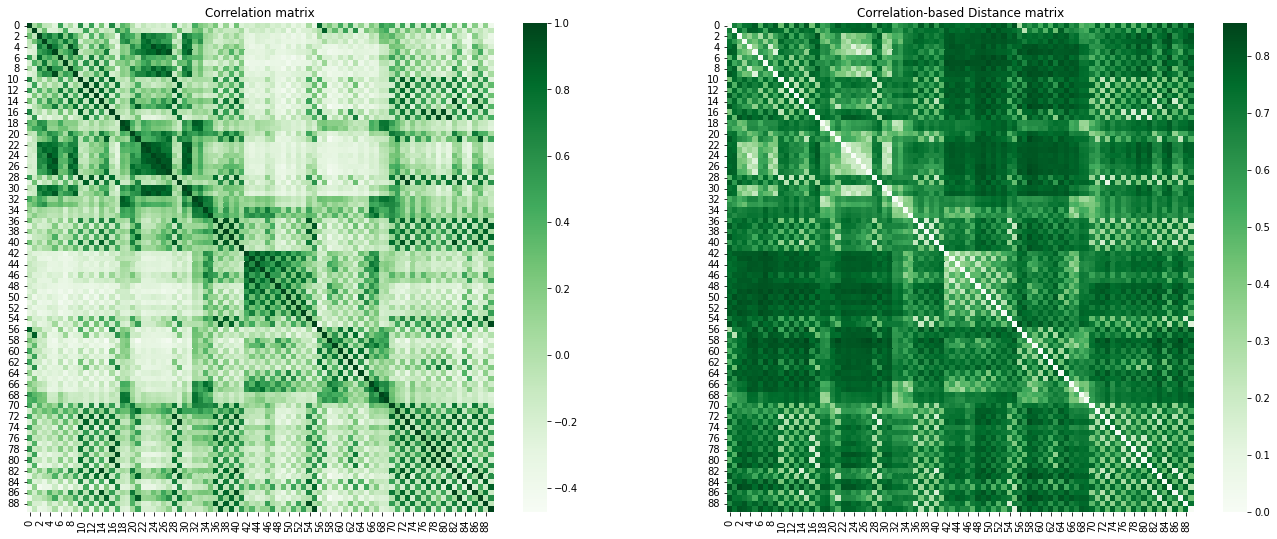

In [51]:
# Representamos las dos matrices como una manera de exploración. 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(corr_mat,ax= ax1, cmap='Greens');
sns.heatmap(dist,    ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation matrix')
ax2.title.set_text('Correlation-based Distance matrix')
plt.show()

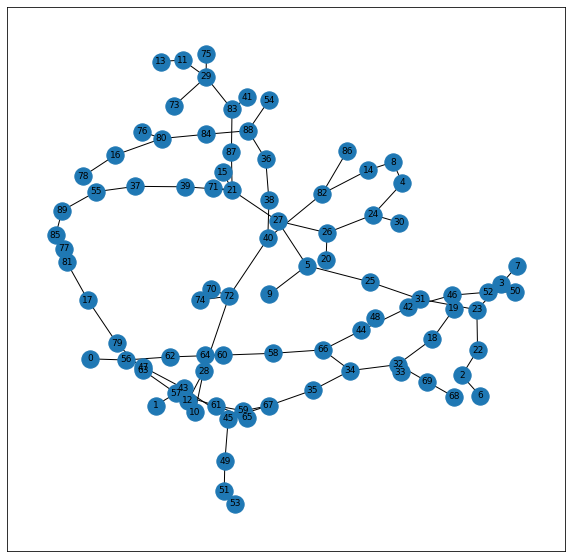

In [52]:
# A partir de la matriz de distancias que hemos obtenido antes, podemos hacer una red de interacciones que permitan comprobar como de cohesionados estan los puntos entre sí, y, de manera 
# preliminar, cuales son las agrupaciones más recurrentes. 

# Evitamos que haya NaNs en la matriz de distancias, que no se pueden incluir en la red de interacciones. 

S = dist.to_numpy()
from numpy import *
where_are_NaNs = isnan(S)
S[where_are_NaNs]=0

# Pasamos la matriz de correlación a red

G = nx.from_numpy_matrix(S)

labels = dist.columns.values
#labels = [s.replace('ft_','') for s in labels] # Si las características tienen una labels concretas en strings, tenemos que incluir esta línea. De otra manera, comentadla. 
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))

# Hacemos la red de interacciones

T=nx.minimum_spanning_tree(G)

fig = plt.figure(figsize=(10,10))
nx.draw_networkx(T,
                 with_labels=True, 
                 font_size=9, 
                 cmap=plt.cm.coolwarm)
plt.show()

Con todo lo que hemos hecho antes, podemos hacer el dendrograma de agrupación. Elegir un método y una distancia, y correr. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


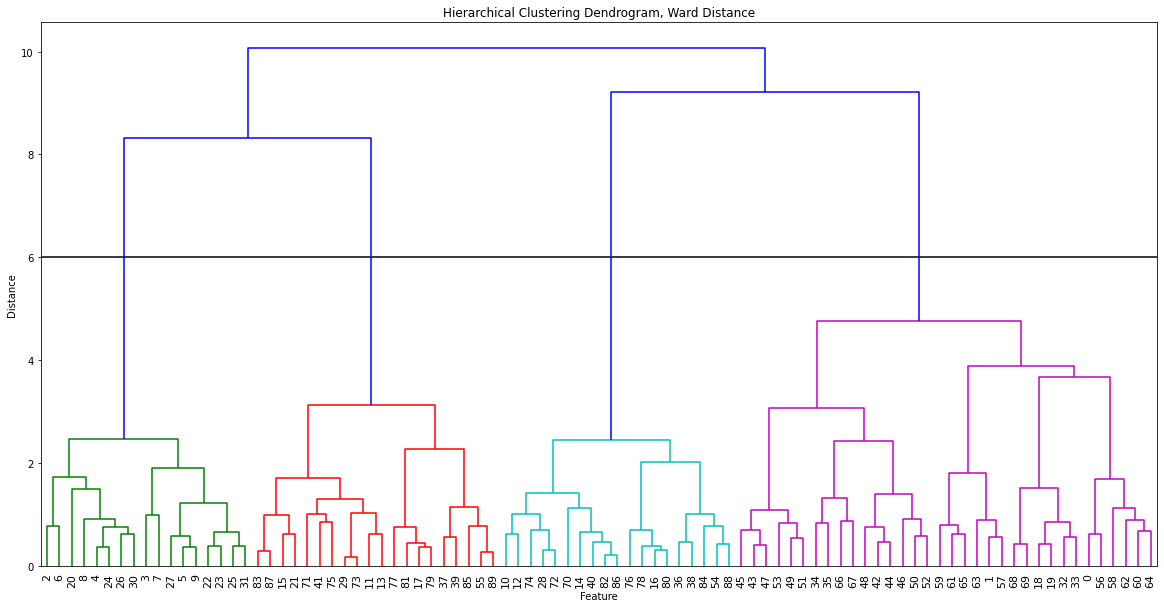

In [53]:
# Matriz de agrupación.  

link=sch.linkage(dist,'ward') # De manera predeterminada, la distancia utilizada es la euclidea. Si queremos cambiarla, añadimos dentro del paréntesis metric='' y la medida 
                                # que queramos utilizar dentro de las comillas. 

# A partir de la matriz de agrupación, vamos a representar el dendrograma. 

fig = plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram, Ward Distance')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.hlines(6,0,2000) # Esta linea es muy útil, porque permite marcar a qué altura vamos a cortar el árbol posteriormente, en función de cuantos grupos queremos sacar. Tener en cuenta. Para
                     # variar la altura, cambiamos el primer número dentro del paréntesis hasta la altura que queramos. 
dn = sch.dendrogram(link,leaf_rotation=90.,leaf_font_size=11.)
plt.show()

In [54]:
# A partir de la altura del árbol que hemos marcado antes, vamos a sacar el número de características que se encuentra en cada cluster a esa altura del árbol. 

max_d = 6
clusters = fcluster(link,t=max_d, criterion='distance') # Hay más criterios para sacar los clusters, pero es recomendable utilizar este, al ser el más general. 

df_clust = pd.DataFrame({'Cluster':clusters, 'Features':df.columns.values.astype('str')})
df_clust.groupby('Cluster').count()

,Features
Cluster,
1,17
2,20
3,19
4,34


In [55]:
# Guardamos las características de antes en un diccionario que nos diga, en cada cluster, qué características se encuentren, para poder saber qué hay en cada rama del árbol

clust_feat = {}
for k in np.unique(clusters):
    clust_feat[k] = df_clust[df_clust.Cluster == k].Features.values

for k in np.unique(clusters):
    print('Cluster_{}'.format(k,2),'->', df_clust[df_clust.Cluster == k].Features.values)

Cluster_1 -> ['2' '3' '4' '5' '6' '7' '8' '9' '20' '22' '23' '24' '25' '26' '27' '30'
 '31']
Cluster_2 -> ['11' '13' '15' '17' '21' '29' '37' '39' '41' '55' '71' '73' '75' '77'
 '79' '81' '83' '85' '87' '89']
Cluster_3 -> ['10' '12' '14' '16' '28' '36' '38' '40' '54' '70' '72' '74' '76' '78'
 '80' '82' '84' '86' '88']
Cluster_4 -> ['0' '1' '18' '19' '32' '33' '34' '35' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '56' '57' '58' '59' '60' '61' '62' '63' '64'
 '65' '66' '67' '68' '69']


Esta siguiente caja de código es opcional, y nos permite ver, de manera ordenada, la matriz de agrupación que hemos utilizado antes para hacer el dendrograma. Representación que puede venir bien como ejemplo para ver qué áreas están relacionadas entre sí. 

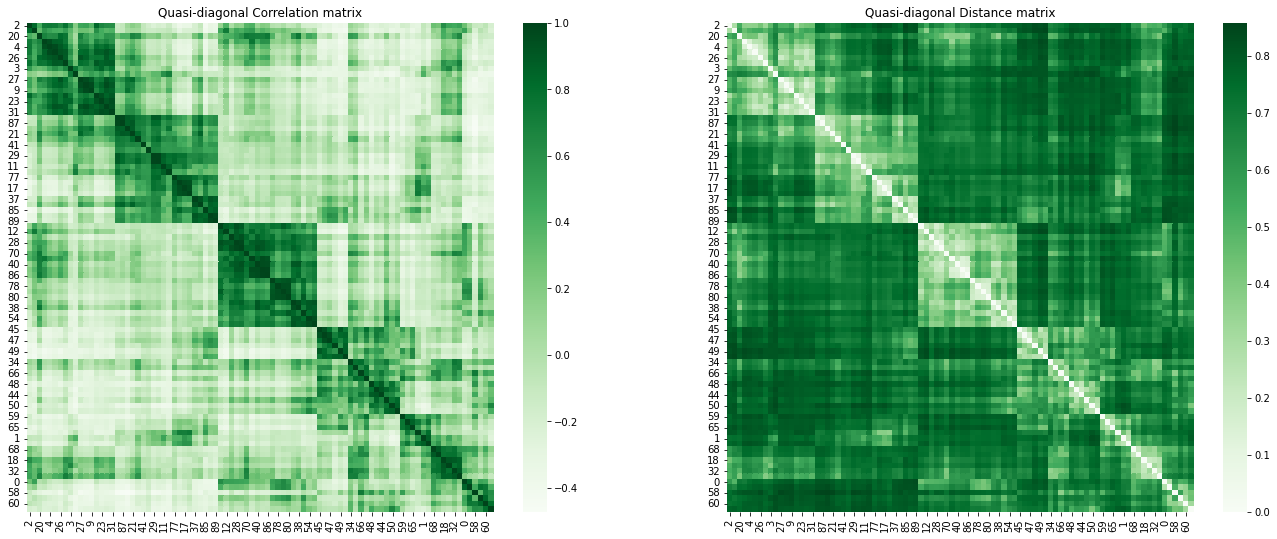

In [56]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link=link.astype(int)
    sortIx=pd.Series([link[-1,0],link[-1,1]])
    numItems=link[-1,3] # number of original items
    while sortIx.max()>=numItems:
        sortIx.index=range(0,sortIx.shape[0]*2,2) # make space
        df0=sortIx[sortIx>=numItems] # find clusters
        i=df0.index;j=df0.values-numItems
        sortIx[i]=link[j,0] # item 1
        df0=pd.Series(link[j,1],index=i+1)
        sortIx=sortIx.append(df0) # item 2
        sortIx=sortIx.sort_index() # re-sort
        sortIx.index=range(sortIx.shape[0]) # re-index
    return sortIx.tolist()

sortIx=getQuasiDiag(link)
sortIx=corr_mat.index[sortIx].tolist() # recover labels
corr_diag=corr_mat.loc[sortIx,sortIx] # reorder

sortIx=getQuasiDiag(link)
sortIx=dist.index[sortIx].tolist() # recover labels
dist_diag=dist.loc[sortIx,sortIx] # reorder

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(corr_diag,ax= ax1, cmap='Greens');
sns.heatmap(dist_diag,ax= ax2, cmap='Greens');
ax1.title.set_text('Quasi-diagonal Correlation matrix')
ax2.title.set_text('Quasi-diagonal Distance matrix')
plt.show()

# Clusterización discretizada

En algunos casos, no nos interesa utilizar los *outliers* o los límites de nuestro *dataframe*, o queremos reducir al máximo la variabilidad de los datos para quedarnos, exclusivamente, con una medida de la información interna, reduciendo al máximo el error a costa de perder cierta cantidad de información. Para ello, podemos discretizar los datos en el número óptimo de paquetes de inforamción o *bins*, y, así, hacer el *workflow* anterior con unos datos normalizados y estandarizados. 

In [57]:
def numBins(nObs,corr=None):
    # Función para obtener una medida óptima de los bins a utilizar en la discretización
    
    if corr is None: # Si no hay correlación, hacemos el caso univariante
        z=(8+324*nObs+12*(36*nObs+729*nObs**2)**.5)**(1/3.)
        b=round(z/6.+2./(3*z)+1./3)
    else: # en cualquier otro caso, aplicamos el caso bivariante
        if np.isnan(corr):
          corr = np.nan_to_num(corr)
        b=round(2**-.5*(1+(1+24*nObs/(1.-corr**2))**.5)**.5)
    return int(b)

def varInfo(x,y,norm=False):
    if (x == y).all():
        return 0
    # a partir de los bins encontrados, hacemos una medida de la variación de la información aportada por cada bin, que será lo que utilicemos como medida de la correlación, en este caso. 

    bXY=numBins(x.shape[0],corr=np.corrcoef(x,y)[0,1])
    cXY=np.histogram2d(x,y,bXY)[0]
    iXY=mutual_info_score(None,None,contingency=cXY)
    hX=ss.entropy(np.histogram(x,bXY)[0]) # marginal
    hY=ss.entropy(np.histogram(y,bXY)[0]) # marginal
    vXY=hX+hY-2*iXY # variation of information
    if norm:
        hXY=hX+hY-iXY # joint
        vXY/=hXY # normalized variation of information
    return vXY

Entonces, a partir de la variación discretizada de la información aportada por los datos, podemos hacer el mismo *workflow* que antes. 

In [58]:
# Utilizamos las funciones creadas antes y calculamos el dataframe discretizado

ft_red = df.dropna()
V = np.zeros(corr_diag.shape)

for i in range(corr_mat.shape[0]):
    for j in range(i):
        x = ft_red.iloc[:,i]
        y = ft_red.iloc[:,j]
        V[i,j] = varInfo(x,y,norm=True)
       
dist_info = pd.DataFrame(V + V.T,columns=df.columns,index=df.columns)
dist_info

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.000000,0.980484,0.914597,0.958274,0.965807,0.953829,0.902699,0.962926,0.960957,0.939712,...,0.868988,0.947346,0.922329,0.934186,0.909790,0.936710,0.946618,0.948526,0.920334,0.938985
1,0.980484,0.000000,0.975721,0.946674,0.974923,0.966030,0.968218,0.926980,0.969580,0.968752,...,0.967471,0.915230,0.956983,0.971299,0.948706,0.949782,0.959827,0.976271,0.956436,0.953067
2,0.914597,0.975721,0.000000,0.842318,0.729697,0.906708,0.689500,0.949932,0.835735,0.921276,...,0.948246,0.937242,0.928206,0.974476,0.938783,0.912418,0.929469,0.974529,0.937637,0.953873
3,0.958274,0.946674,0.842318,0.000000,0.901159,0.841212,0.894336,0.792325,0.929060,0.820265,...,0.943489,0.964773,0.942347,0.955377,0.944269,0.944456,0.949641,0.962516,0.958217,0.962861
4,0.965807,0.974923,0.729697,0.901159,0.000000,0.825346,0.820972,0.935111,0.511028,0.855933,...,0.953338,0.961515,0.896195,0.916604,0.956337,0.945341,0.866854,0.922249,0.967041,0.969274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.936710,0.949782,0.912418,0.944456,0.945341,0.945892,0.938538,0.970810,0.936693,0.954751,...,0.939816,0.695426,0.946668,0.872161,0.950716,0.000000,0.945782,0.890168,0.961308,0.695368
86,0.946618,0.959827,0.929469,0.949641,0.866854,0.958300,0.912801,0.956246,0.833860,0.935370,...,0.856526,0.951260,0.379689,0.970163,0.853149,0.945782,0.000000,0.935142,0.741565,0.966058
87,0.948526,0.976271,0.974529,0.962516,0.922249,0.817527,0.932946,0.935580,0.925516,0.813865,...,0.966540,0.876088,0.958447,0.410735,0.957040,0.890168,0.935142,0.000000,0.950244,0.821863
88,0.920334,0.956436,0.937637,0.958217,0.967041,0.962368,0.959662,0.936098,0.955535,0.950756,...,0.760975,0.956152,0.787752,0.954329,0.625991,0.961308,0.741565,0.950244,0.000000,0.961699


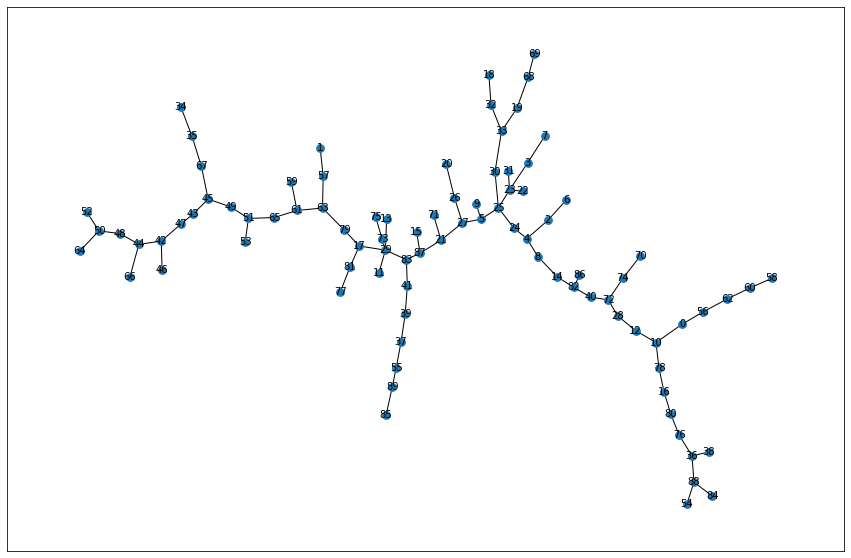

In [59]:
# Transformamos el dataframe creado antes en una matriz

X = dist_info.to_numpy()
G = nx.from_numpy_matrix(X)

# Transformarmos la matriz en una red de interacciones. Como se puede ver, la cohesión de la red ahora es muchísimo más alta

labels = dist.columns.values
G = nx.relabel_nodes(G, dict(zip(range(len(labels)), labels)))
T=nx.minimum_spanning_tree(G)

# Representamos la red de interacciones. 

fig = plt.figure(figsize=(15, 10))
nx.draw_networkx(T, with_labels=True, font_size=10, node_size=60,pos=nx.kamada_kawai_layout(T))
plt.show()

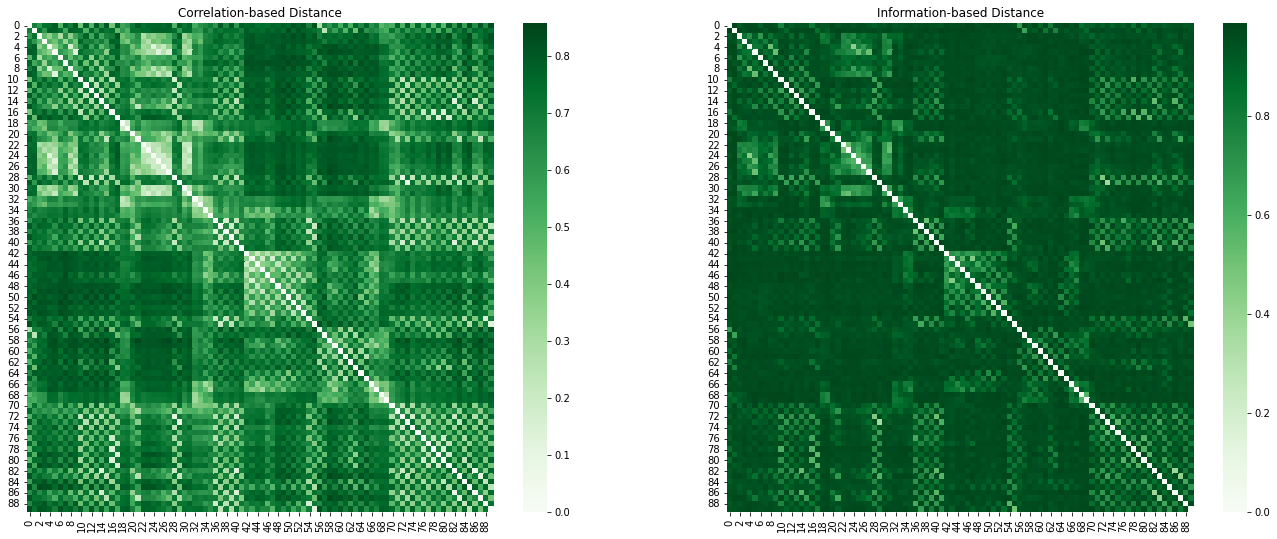

In [60]:
# Representamos la matriz de correlación de los datos discretizados. Es una representación más que otra cosa. 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23,9))

sns.heatmap(dist,     ax= ax1, cmap='Greens');
sns.heatmap(dist_info,ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation-based Distance')
ax2.title.set_text('Information-based Distance')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


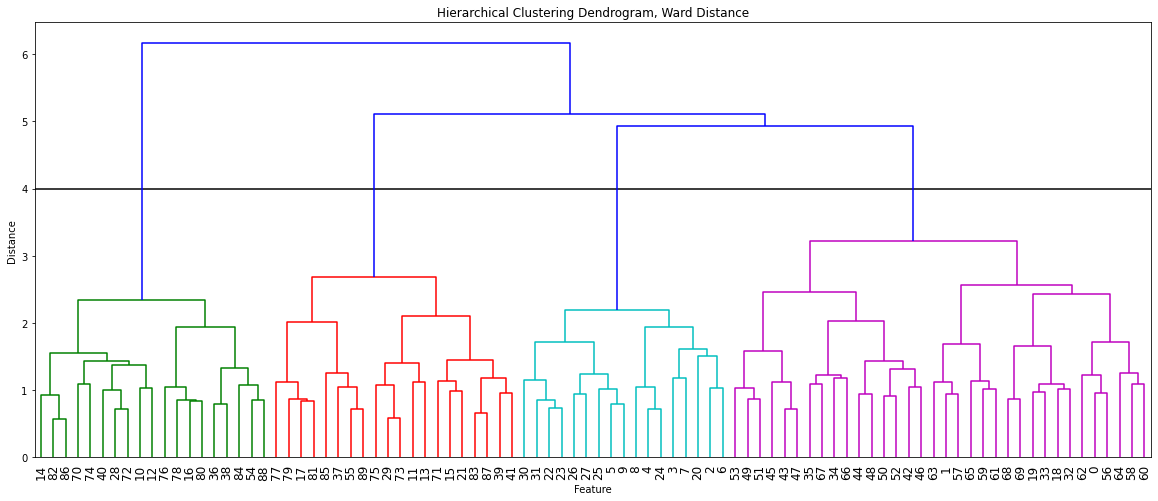

In [61]:
link_info=sch.linkage(dist_info,'ward')
fig = plt.figure(figsize=(20, 8))
plt.title('Hierarchical Clustering Dendrogram, Ward Distance')
plt.xlabel('Feature')
plt.ylabel('Distance')
plt.hlines(4,0,2000)
dn = sch.dendrogram(link_info, leaf_rotation=90.,leaf_font_size=12.)
plt.show()

In [62]:
max_d = 4
clusters = fcluster(link_info,t=max_d, criterion='distance')

df_clust = pd.DataFrame({'Cluster':clusters, 'Features':df.columns.values.astype('str')})
df_clust.groupby('Cluster').count()

,Features
Cluster,
1,19
2,20
3,17
4,34


In [63]:
for k in np.unique(clusters):
    print('Cluster_{}'.format(k,2),'->', df_clust[df_clust.Cluster == k].Features.values)

Cluster_1 -> ['10' '12' '14' '16' '28' '36' '38' '40' '54' '70' '72' '74' '76' '78'
 '80' '82' '84' '86' '88']
Cluster_2 -> ['11' '13' '15' '17' '21' '29' '37' '39' '41' '55' '71' '73' '75' '77'
 '79' '81' '83' '85' '87' '89']
Cluster_3 -> ['2' '3' '4' '5' '6' '7' '8' '9' '20' '22' '23' '24' '25' '26' '27' '30'
 '31']
Cluster_4 -> ['0' '1' '18' '19' '32' '33' '34' '35' '42' '43' '44' '45' '46' '47' '48'
 '49' '50' '51' '52' '53' '56' '57' '58' '59' '60' '61' '62' '63' '64'
 '65' '66' '67' '68' '69']


Misma representación de la matriz de agrupación que hemos visto antes. Opcional.

In [64]:
sortIx=getQuasiDiag(link_info)
sortIx=dist_info.index[sortIx].tolist() # recover labels
dist_info_diag=dist_info.loc[sortIx,sortIx] # reorder

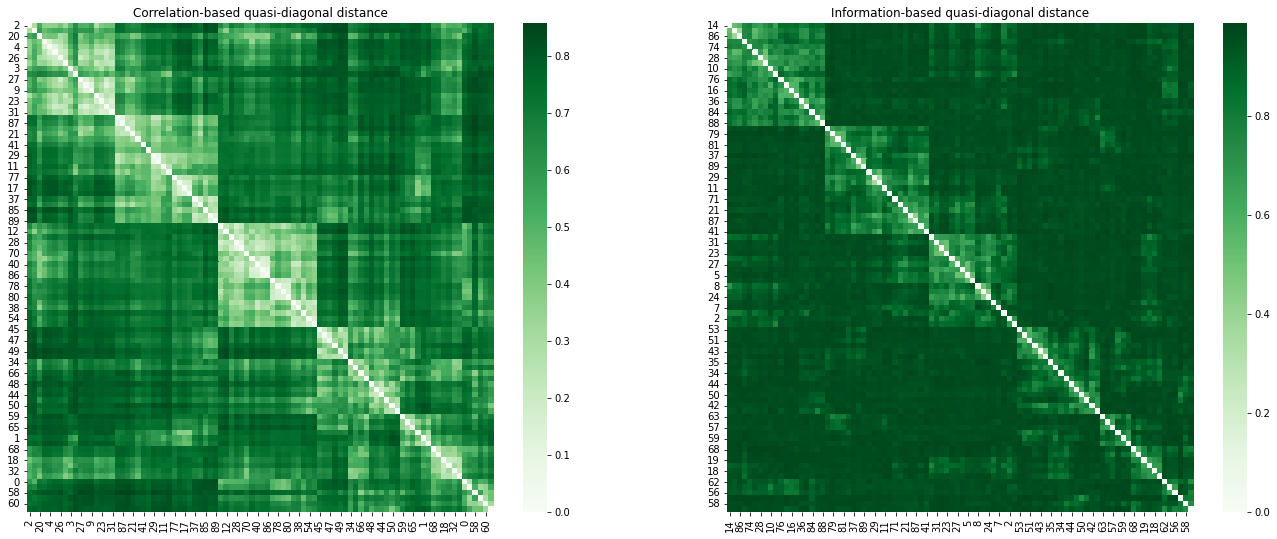

In [65]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(23, 9))

sns.heatmap(dist_diag,     ax= ax1, cmap='Greens');
sns.heatmap(dist_info_diag,ax= ax2, cmap='Greens');
ax1.title.set_text('Correlation-based quasi-diagonal distance')
ax2.title.set_text('Information-based quasi-diagonal distance')
plt.show()